In [1]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import load_iris
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from sklearn . neighbors import KNeighborsClassifier
from sklearn . metrics import classification_report , confusion_matrix

In [9]:
# Load built -in Iris dataset ( offline )
iris = load_iris ( as_frame = True )
df = iris . frame
df ["species"] = df ["target"]. map ( dict ( enumerate ( iris . target_names ) ) )
df = df.drop ( columns ="target")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Prepare features and labels
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [28]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [25]:
df.shape

(150, 5)

In [16]:
# Train / test split
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size=0.2 , random_state =42)

In [17]:
# Normalize
scaler = StandardScaler ()
X_train_scaled = scaler . fit_transform (X_train)
X_test_scaled = scaler . transform (X_test)

In [19]:
# Train KNN model
knn = KNeighborsClassifier ( n_neighbors =3)
knn . fit ( X_train_scaled , y_train )

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
# Predict and evaluate
y_pred = knn . predict ( X_test_scaled )

In [26]:
print ("\nClassification Report :\n", classification_report ( y_test,y_pred ) )
print (" Confusion Matrix :\n", confusion_matrix ( y_test , y_pred ) )


Classification Report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

 Confusion Matrix :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


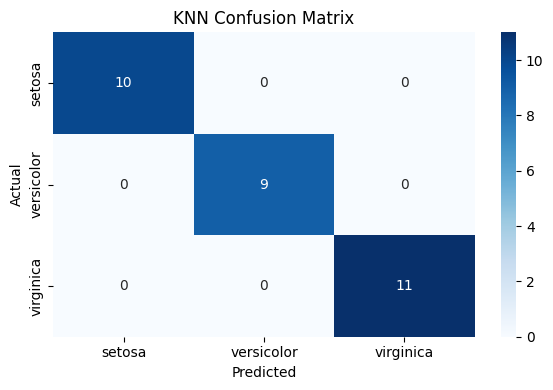

In [27]:
# Plot confusion matrix
import seaborn as sns
plt . figure ( figsize =(6 ,4) )
sns . heatmap ( confusion_matrix ( y_test , y_pred ) , annot = True , fmt ="d", cmap ="Blues", xticklabels = knn . classes_ , yticklabels = knn . classes_ )
plt . title ("KNN Confusion Matrix")
plt . xlabel ("Predicted")
plt . ylabel ("Actual")
plt . tight_layout ()
plt . show ()